In [5]:
from finquant.portfolio import build_portfolio

In [9]:
names = ['WIKI/GOOG', 'WIKI/AMZN', 'WIKI/MCD', 'WIKI/DIS']
pf = build_portfolio(names=names)

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-package

In [10]:
names = ['GOOG', 'AMZN', 'MCD', 'DIS']
pf = build_portfolio(names=names, data_api="yfinance")


[*********************100%***********************]  4 of 4 completed


/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/portfolio.py:260: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.portfolio = self.portfolio.append(stock.investmentinfo, ignore_index=True)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-package

# Loading local data
```python 

import pathlib
from finquant.portfolio import build_portfolio
df_data_path = pathlib.Path() / 'data' / 'ex1-stockdata.csv'
df_data = pd.read_csv(df_data_path, index_col='Date', parse_dates=True)
# building a portfolio by providing stock data
pf = build_portfolio(data=df_data)
```

In [11]:
pf.properties()

----------------------------------------------------------------------
Stocks: GOOG, AMZN, MCD, DIS
Time window/frequency: 252
Risk free rate: 0.005
Portfolio Expected Return: 0.259
Portfolio Volatility: 0.261
Portfolio Sharpe Ratio: 0.971

Skewness:
       GOOG      AMZN       MCD       DIS
0  1.409653  1.688409  2.178904  1.973754

Kurtosis:
       GOOG      AMZN       MCD       DIS
0  1.140342  1.652733  4.004047  3.178247

Information:
   Allocation  Name
0        0.25  GOOG
1        0.25  AMZN
2        0.25   MCD
3        0.25   DIS
----------------------------------------------------------------------


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

               DIS        10d        50d       100d        150d        200d
Date                                                                       
2023-04-18  100.93  99.804201  99.124585  99.774425  101.681572  104.599976
2023-04-19   98.75  99.612528  99.109895  99.754140  101.642743  104.541767
2023-04-20   98.07  99.332068  99.069115  99.720790  101.595422  104.477372
2023-04-21   99.57  99.375329  99.088757  99.717804  101.568595  104.428542
2023-04-24   99.68  99.430723  99.111943  99.717056  101.543581  104.381293


<Figure size 1500x500 with 0 Axes>

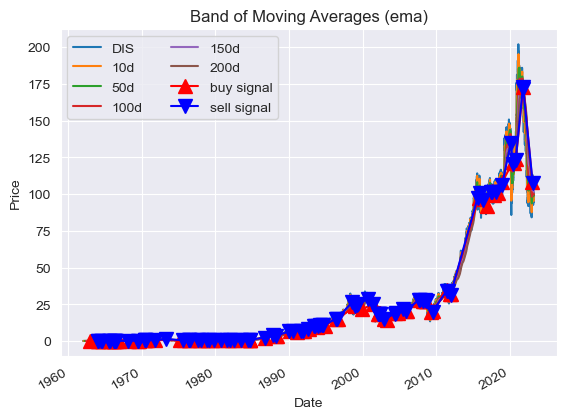

In [16]:

from finquant.moving_average import compute_ma, ema

dis = pf.get_stock("DIS").data.copy(deep=True)
spans = [10, 50, 100, 150, 200]
plt.figure(figsize=(15, 5));
ma = compute_ma(dis, ema, spans, plot=True)
print(ma.tail())

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/monte_carlo.py:37: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.asarray(result)
/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/finquant/portfolio.py:684: UserWarning: Legend does not support handles for Annotation instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend()


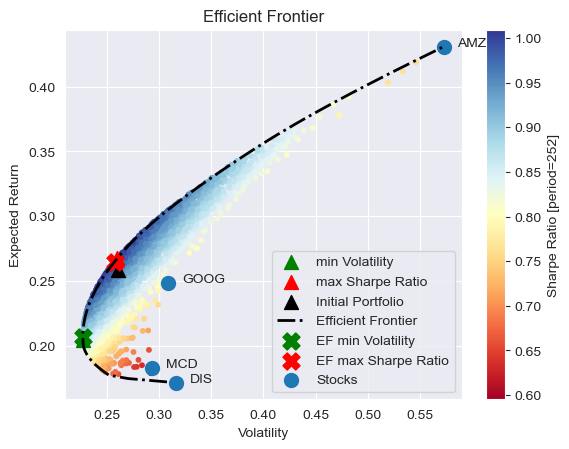

In [22]:
# monte-carlo optimization
opt_w, opt_res = pf.mc_optimisation(num_trials=5000)
pf.mc_plot_results()
# minimisation to compute efficient frontier and optimal portfolios among it
pf.ef_plot_efrontier()
pf.ef.plot_optimal_portfolios()
pf.plot_stocks()